# What percentage of Data Analyst job postings mention that no degree is required, and how does this affect the salary offered?

In [8]:
# Importing the needed libraries

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load the data
data_loaded = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Data\data_jobs.csv')

# Filter Data for Data Analyst Jobs listed in the United States
df_USA = data_loaded[(data_loaded['job_country'] == 'United States') &
                     (data_loaded['job_title_short'] == 'Data Analyst')].copy()

# From the info viewed, the job_posted_date column is showed as an object(str)
# We will transform the date column to have datetime as a data type

df_USA['job_posted_date'] = pd.to_datetime(df_USA['job_posted_date'])

# Adding a month column to the data
df_USA['job_posted_month'] = df_USA['job_posted_date'].dt.month_name()
df_USA['job_posted_day'] = df_USA['job_posted_date'].dt.day_name()

df_USA_cleaned = df_USA.dropna(subset=['salary_year_avg']).reset_index().drop('index', axis =1)

# View the head of the data
print('Shape of the data:',(df_USA_cleaned.shape))
df_USA_cleaned.head()

Shape of the data: (4350, 19)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
0,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",October,Thursday
1,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"['excel', 'powerpoint']","{'analyst_tools': ['excel', 'powerpoint']}",February,Monday
2,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"['sql', 'word', 'excel', 'visio', 'powerpoint'...","{'analyst_tools': ['word', 'excel', 'visio', '...",January,Tuesday
3,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"['sql', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr...",November,Tuesday
4,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"['sql', 'excel', 'power bi']","{'analyst_tools': ['excel', 'power bi'], 'prog...",October,Tuesday


In [3]:
df_USA_cleaned.groupby('job_no_degree_mention').size()

job_no_degree_mention
False    3384
True      966
dtype: int64

In [4]:
df_job_degree = df_USA_cleaned[['job_no_degree_mention', 'company_name', 'salary_year_avg']]

df_job_degree_True = df_job_degree[df_job_degree['job_no_degree_mention'] == True]

df_job_degree_True = df_job_degree_True.groupby('company_name').agg(
    count = ('company_name', 'size'),
    salary_year_avg = ('salary_year_avg', 'mean')).sort_values(by = 'count', ascending=False).head(10)

df_job_degree_True

,count,salary_year_avg
company_name,,
Robert Half,66,91306.818182
"Acadia Technologies, Inc.",52,72115.384615
Insight Global,30,100575.850000
CyberCoders,17,113235.294118
Jobot,11,91727.272727
Upen Group Inc,10,50881.364062
Worldgate LLC,9,110000.000000
Booz Allen Hamilton,7,125714.285714
Motion Recruitment,7,110714.285714


In [5]:
df_job_degree_False = df_job_degree[df_job_degree['job_no_degree_mention'] == False]

df_job_degree_False = df_job_degree_False.groupby('company_name').agg(
    count = ('company_name', 'size'),
    salary_year_avg = ('salary_year_avg', 'mean')).sort_values(by = 'count', ascending=False).head(10)

df_job_degree_False

,count,salary_year_avg
company_name,,
Get It Recruit - Information Technology,136,88275.735294
Citi,84,122607.142857
Insight Global,57,90722.000000
Jobot,49,91989.795918
TikTok,42,157579.511905
Robert Half,40,85381.250000
Booz Allen Hamilton,28,102166.071429
Leidos,22,79376.136364
TIAA,22,124301.772727


In [6]:
df_job_degree_True = df_job_degree_True.sort_values(by = 'salary_year_avg', ascending = False)
df_job_degree_False = df_job_degree_False.sort_values(by = 'salary_year_avg', ascending = False)

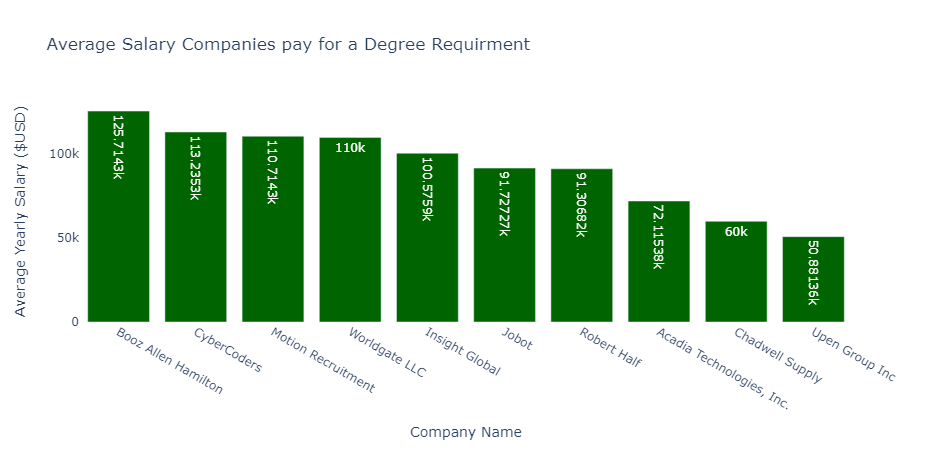

In [11]:
data_list = [df_job_degree_True, df_job_degree_False]
data_title = ['Average Salary Companies pay for a Degree Requirment',
              'Average Salary of Jobs Companies pay for no Degree Requirment']
    
fig = px.bar(data_frame = df_job_degree_True, x =df_job_degree_True.index, y = 'salary_year_avg',
             color_discrete_sequence= ['darkgreen'], labels= {'company_name':'Company Name',
                                                              'salary_year_avg':'Average Yearly Salary ($USD)'},
             title = 'Average Salary Companies pay for a Degree Requirment',
             text_auto = True)

fig.update_layout(plot_bgcolor = '#ffffff', paper_bgcolor = '#ffffff')
    
# fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\Degree_Required.png')


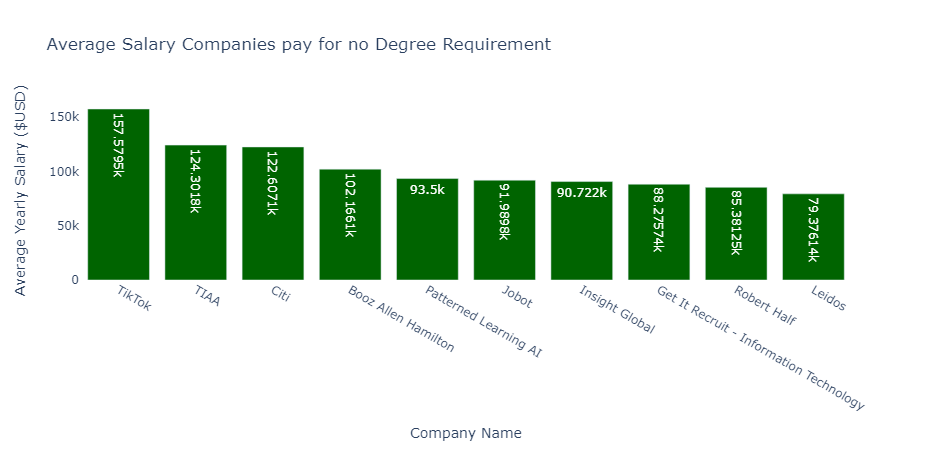

In [16]:
data_list = [df_job_degree_True, df_job_degree_False]
data_title = ['Average Salary Companies pay for a Degree Requirment',
              'Average Salary of Jobs Companies pay for no Degree Requirement']
    
fig = px.bar(data_frame = df_job_degree_False, x =df_job_degree_False.index, y = 'salary_year_avg',
             color_discrete_sequence= ['darkgreen'], labels= {'company_name':'Company Name',
                                                              'salary_year_avg':'Average Yearly Salary ($USD)'},
             title = 'Average Salary Companies pay for no Degree Requirement',
             text_auto = True)

fig.update_layout(plot_bgcolor = '#ffffff', paper_bgcolor = '#ffffff')
    
# fig.show()

Image(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Images\No_Degree_Required.png')
